# Community Detection - rice_ml
This notebook demonstrates how to use the CommunityDetector class within the rice_ml package. It demonstrates it in an informative way that also analyzes the results, mirroring a standard use case of the classes.

Note: In practical applications, unsupervised models often require careful hyperparameter selection and evaluation using appropriate clustering or stability metrics. In some cases, multiple runs with different initializations may be necessary to assess robustness.

This notebook shows how to:
- Use 'CommunityDetector' from 'rice_ml'
- Prepare and normalize data using 'rice_ml'
- Evaluate CommunityDetector

## Table of Contents
- [Algorithm](#algorithm)
- [Data Preparation](#data-preparation)
- [Model Training](#model-training)
- [Results](#results)

## Algorithm
Community detection refers to a class of unsupervised algorithms used to identify groups of nodes within a graph that are more densely connected to each other than to the rest of the network. Unlike clustering methods such as K-means or DBSCAN, community detection operates on graph-structured data rather than points in feature space.

The algorithm works by analyzing the connectivity patterns between nodes. Communities are formed by grouping nodes that share many connections, often optimizing a quality measure such as modularity, which compares the density of edges within communities to the density of edges between communities. Different methods exist, but the common goal is to uncover the underlying structure of the network.

![Community Detection Example](../images/community_detection.png)
Source: [Medium](https://medium.com/data-science/community-detection-algorithms-9bd8951e7dae)

This visualization highlights a key difference between community detection and distance-based clustering algorithms. While methods like K-means and DBSCAN group data based on geometric proximity or density in feature space, community detection groups nodes based on relationships encoded in a graph. As a result, communities can take arbitrary shapes and sizes, determined entirely by the structure of the connections.

Because community detection relies on graph connectivity rather than distance in a feature space, feature scaling is typically not required. Instead, the quality of the detected communities depends on how the graph is constructed and how edges represent relationships between nodes.

For example, when analyzing social networks or interaction graphs, community detection can uncover tightly connected groups that represent shared interests, roles, or behaviors. This makes it particularly useful in settings where relationships between entities are more informative than raw feature similarity.

### Pros vs Cons
#### Pros
- Does not require specifying the number of communities in advance
- Can identify communities of arbitrary shape and size
- Naturally operates on graph-structured data
- Well-suited for relational and network-based problems
#### Cons
- Results depend heavily on graph construction
- Interpretation can be less straightforward than centroid-based methods
- Performance varies across different detection algorithms
- Not directly applicable to non-graph data without preprocessing

## Data Preparation
We will be using the Zachary Karate Club graph, a small social network consisting of 34 nodes representing members of a karate club and edges representing social interactions between them.

This dataset is commonly used to demonstrate community detection algorithms because it contains an underlying community structure that naturally emerges from the network’s connectivity. In this example, node labels are not used during training and are included only for reference.

Graph Summary:
Number of nodes: 34
Number of edges: 78
Degree Summary:
Min degree: 1
Max degree: 17
Mean degree: 4.59


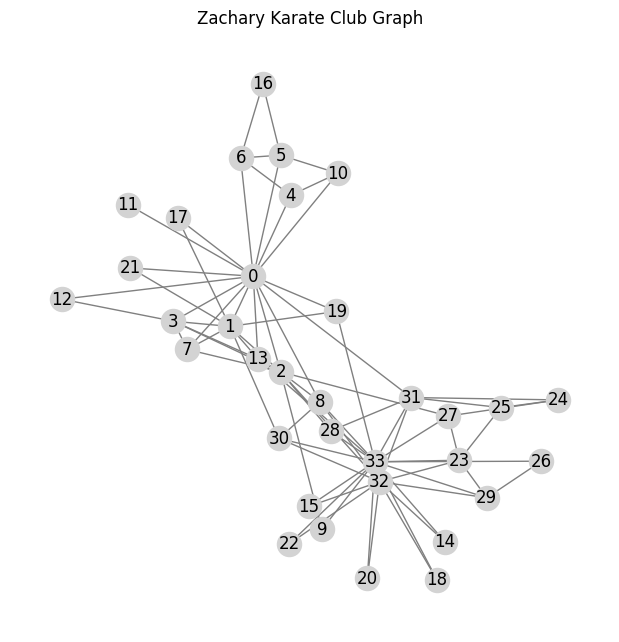

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

G = nx.karate_club_graph()

A = nx.to_numpy_array(G)

print("Graph Summary:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

degrees = dict(G.degree())

print("Degree Summary:")
print(f"Min degree: {min(degrees.values())}")
print(f"Max degree: {max(degrees.values())}")
print(f"Mean degree: {sum(degrees.values()) / len(degrees):.2f}")

plt.figure(figsize=(6, 6))

pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    node_size=300,
    node_color="lightgray",
    edge_color="gray",
    with_labels=True
)

plt.title("Zachary Karate Club Graph")
plt.show()

The visualization above shows the structure of the graph prior to applying any community detection algorithm. With a graph like this, position of the nodes are arbitrary and are simply there for visualization. They do not influence the model. This plot is provided to give an initial sense of the network’s connectivity before communities are identified.
Note as well that this is an unweighted, undirected graph.

## Model Training
Note that since this is unsupervised, there is no splitting of the data.

Number of communities detected: 5
Modularity score: 0.427


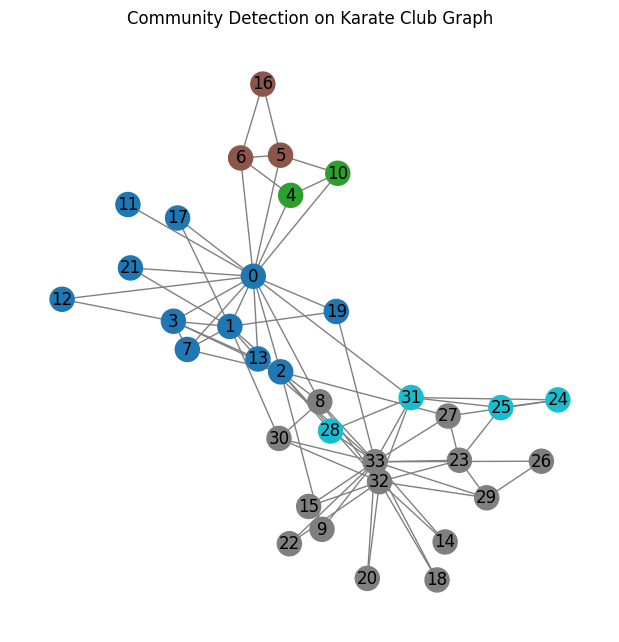

In [ ]:
from rice_ml.unsupervised_learning.community_detection import CommunityDetector

model = CommunityDetector(
    resolution=1.0,
    max_iter=100,
    random_state=42
)

model.fit(A)

labels = model.labels_

print("Number of communities detected:", model.n_communities_)
print("Modularity score:", round(model.modularity_, 3))

plt.figure(figsize=(6, 6))
nx.draw(
    G,
    pos,
    node_color=labels,
    cmap="tab10",
    node_size=300,
    edge_color="gray",
    with_labels=True
)

plt.title("Community Detection on Karate Club Graph")
plt.show()

## Results

The algorithm detected 5 communities with a modularity score of 0.427, indicating a strong community structure within the graph. Nodes within each community are more densely connected to one another than to nodes in other communities, which suggests that the detected partition captures meaningful structure in the network.

Modularity measures how much more densely connected nodes are within communities compared to between communities. It ranges from -1 to 1, with higher values indicating a stronger community structure, with values above approximately 0.4 generally considered a strong result for real-world networks.

Although the visualization places nodes in two-dimensional space for interpretability, it does not visualize the separation of communities as well. The quality of the result should be judged using modularity rather than visual separation. A modularity score above 0.4 is generally considered a strong outcome, confirming that the algorithm is effectively grouping nodes based on connectivity rather than spatial proximity.

Overall, these results demonstrate that the community detection algorithm is performing as intended on this dataset.

Below, we analyze how the model performs when using bad parameters. This highlights the importance of proper parameter tuning and how models are affected by them.

Number of communities detected: 5
Modularity score: 0.035


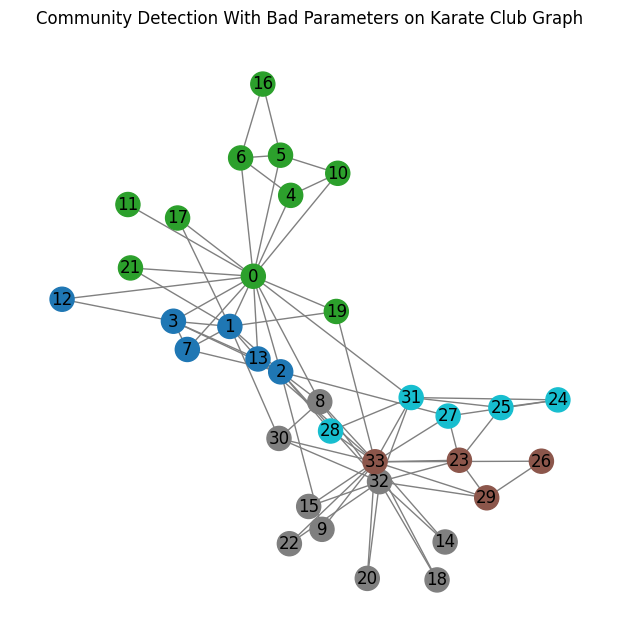

In [6]:
bad_model = CommunityDetector(
    resolution=2.5,
    random_state=42
)

bad_model.fit(A)

labels = bad_model.labels_

print("Number of communities detected:", bad_model.n_communities_)
print("Modularity score:", round(bad_model.modularity_, 3))

plt.figure(figsize=(6, 6))
nx.draw(
    G,
    pos,
    node_color=labels,
    cmap="tab10",
    node_size=300,
    edge_color="gray",
    with_labels=True
)

plt.title("Community Detection With Bad Parameters on Karate Club Graph")
plt.show()

While the model still detected 5 communities, we can see it very clearly struggles with these parameters, with a modularity score of just 0.035. This suggests that the partition is only slightly better than random, and the algorithm is not finding strong, well-separated communities under this configuration.

## Conclusion

Overall, community detection provides an effective way to identify structure in graph-based data by grouping nodes according to connectivity patterns. Unlike distance-based clustering methods, it does not rely on feature space or geometric assumptions.

The results demonstrate that the algorithm, when parameters are chosen appropriately, is able to uncover meaningful communities that are hard to see at first glance, with modularity serving as a useful quantitative measure of clustering quality. This makes community detection a strong choice for analyzing relational and network-structured data.